### Loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

### Loading data

In [2]:
data = pd.read_csv('iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data['species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

In [4]:
data = data[data['species'] != 'Iris-virginica']

In [5]:
data['species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

In [6]:
data['species'] = data['species'].apply(lambda x: 0 if x == 'Iris-versicolor' else 1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['species'], axis=1), data['species'], test_size=0.2, 
                                                    random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80, 4)
(80,)
(20, 4)
(20,)


### Model architecture

![alt text](image_3.png "Title")

### Steps to follow

<li>Initialize parameters</li>
<li>Compute score (the linear function)</li>
<li>Compute activation using the score</li>
<li>Complete the entire forward propagation step</li>
<li>Complete cost/error</li>
<li>Complete gradients</li>
<li>Update the initialized weights</li>
<li>Complete the entire back propagation step</li>

### Initializing parameters

#### Symmetry problem in gradient descent

In [8]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [9]:
parameters = initialize_parameters(4, 3, 1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756 -0.00528172 -0.01072969]
 [ 0.00865408 -0.02301539  0.01744812 -0.00761207]
 [ 0.00319039 -0.0024937   0.01462108 -0.02060141]]
b1 = [[0.]
 [0.]
 [0.]]
W2 = [[-0.00322417 -0.00384054  0.01133769]]
b2 = [[0.]]


### Computing score (linear function)

In [11]:
def compute_score(A, W, b):
    """
    Implement the linear part of a layer's forward propagation i.e. computing the score.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of data points)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = np.dot(W, A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

#### <font color='red'>Why are we caching A, W and be here?</font>

In [16]:
np.random.seed(1)
A = np.random.randn(4, 1)
W = np.random.randn(3, 4)
b = np.random.randn(3, 1)
compute_score(A, W, b)[0]

array([[2.53646455],
       [1.23114741],
       [0.3347684 ]])

### Applying activation function

In [17]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

In [18]:
def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    cache = Z 
    return A, cache

In [19]:
def apply_activation(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    if activation == "sigmoid":
        Z, linear_cache = compute_score(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = compute_score(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [20]:
np.random.seed(2)
A_prev = np.random.randn(4, 1)
W = np.random.randn(3, 4)
b = np.random.randn(3, 1)
apply_activation(A_prev, W, b, activation='relu')[0]

array([[0.      ],
       [4.248886],
       [0.      ]])

### forward propagation

In [21]:
def forward_propagation(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of observations)
    parameters -- output of initialize_parameters()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of apply_activation()
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    for l in range(1, L):
        A_prev = A 
        A, cache = apply_activation(A_prev, parameters['W'+str(l)], parameters['b'+str(l)], activation = "relu")
        caches.append(cache)
        
    AL, cache = apply_activation(A, parameters['W'+str(l+1)], parameters['b'+str(l+1)], activation="sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
    
    return AL, caches

In [23]:
np.random.seed(1)
X = np.random.randn(4,10)
W1 = np.random.randn(3,4)
b1 = np.random.randn(3,1)
W2 = np.random.randn(1,3)
b2 = np.random.randn(1,1)
parameters = {"W1": W1,
            "b1": b1,
            "W2": W2,
            "b2": b2}

forward_propagation(X, parameters)[0]

array([[0.73736167, 0.6345208 , 0.58031612, 0.5709155 , 0.78774671,
        0.68975345, 0.62698738, 0.76990849, 0.980209  , 0.74654404]])

### Compute cost/error

$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(y_{hat}^{(i)}\right) + (1-y^{(i)})\log\left(1- y_{hat}^{(i)}\right))$$

In [24]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by above equation.

    Arguments:
    AL, y_hat -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    m = Y.shape[1]

    cost = - np.sum(np.multiply(np.log(AL), Y) + np.multiply(np.log(1-AL), (1-Y)))/m
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    
    assert(cost.shape == ())
    
    return cost

In [25]:
Y = np.asarray([[1, 1, 0]])
aL = np.array([[.8,.9,0.4]])
compute_cost(aL, Y)

0.2797765635793423

### Computing gradients

In [26]:
def compute_gradients(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ, A_prev.T)/m
    db = np.sum(dZ, axis=1, keepdims=True)/m
    dA_prev = np.dot(W.T, dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [27]:
np.random.seed(1)
dZ = np.random.randn(3,4)
A = np.random.randn(5,4)
W = np.random.randn(3,5)
b = np.random.randn(3,1)
linear_cache = (A, W, b)
compute_gradients(dZ, linear_cache)

(array([[-1.15171336,  0.06718465, -0.3204696 ,  2.09812712],
        [ 0.60345879, -3.72508701,  5.81700741, -3.84326836],
        [-0.4319552 , -1.30987417,  1.72354705,  0.05070578],
        [-0.38981415,  0.60811244, -1.25938424,  1.47191593],
        [-2.52214926,  2.67882552, -0.67947465,  1.48119548]]),
 array([[ 0.07313866, -0.0976715 , -0.87585828,  0.73763362,  0.00785716],
        [ 0.85508818,  0.37530413, -0.59912655,  0.71278189, -0.58931808],
        [ 0.97913304, -0.24376494, -0.08839671,  0.55151192, -0.10290907]]),
 array([[-0.14713786],
        [-0.11313155],
        [-0.13209101]]))

### Applying activation function backwards

In [28]:
def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
        
    return dZ

In [29]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, we should set dz to 0 as well. 
    dZ[Z <= 0] = 0
        
    return dZ

In [30]:
def apply_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = compute_gradients(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = compute_gradients(dZ, linear_cache)
    
    return dA_prev, dW, db

In [31]:
np.random.seed(2)
dA = np.random.randn(1,2)
A = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)
Z = np.random.randn(1,2)
linear_cache = (A, W, b)
activation_cache = Z
linear_activation_cache = (linear_cache, activation_cache)

apply_activation_backward(dA, linear_activation_cache, 'relu')

(array([[ 0.44090989,  0.        ],
        [ 0.37883606,  0.        ],
        [-0.2298228 ,  0.        ]]),
 array([[ 0.44513824,  0.37371418, -0.10478989]]),
 array([[-0.20837892]]))

### Backward propagation

In [32]:
def backward_propagation(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = apply_activation_backward(dAL, caches[L-1], activation="sigmoid")
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = current_cache
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 2)], caches". Outputs: "grads["dA" + str(l + 1)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = apply_activation_backward(grads["dA" + str(l + 2)], caches[l], activation="relu")
        dA_prev_temp, dW_temp, db_temp = current_cache
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [33]:
np.random.seed(3)
AL = np.random.randn(1, 2)
Y = np.array([[1, 0]])

A1 = np.random.randn(4,2)
W1 = np.random.randn(3,4)
b1 = np.random.randn(3,1)
Z1 = np.random.randn(3,2)
linear_cache_activation_1 = ((A1, W1, b1), Z1)

A2 = np.random.randn(3,2)
W2 = np.random.randn(1,3)
b2 = np.random.randn(1,1)
Z2 = np.random.randn(1,2)
linear_cache_activation_2 = ((A2, W2, b2), Z2)

caches = (linear_cache_activation_1, linear_cache_activation_2)

backward_propagation(AL, Y, caches)

{'dA2': array([[ 0.12913162, -0.44014127],
        [-0.14175655,  0.48317296],
        [ 0.01663708, -0.05670698]]),
 'dW2': array([[-0.39202432, -0.13325855, -0.04601089]]),
 'db2': array([[0.15187861]]),
 'dA1': array([[ 0.        ,  0.52257901],
        [ 0.        , -0.3269206 ],
        [ 0.        , -0.32070404],
        [ 0.        , -0.74079187]]),
 'dW1': array([[0.41010002, 0.07807203, 0.13798444, 0.10502167],
        [0.        , 0.        , 0.        , 0.        ],
        [0.05283652, 0.01005865, 0.01777766, 0.0135308 ]]),
 'db1': array([[-0.22007063],
        [ 0.        ],
        [-0.02835349]])}

### Updating parameters

In [34]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Updating rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    return parameters

In [35]:
np.random.seed(2)
W1 = np.random.randn(3,4)
b1 = np.random.randn(3,1)
W2 = np.random.randn(1,3)
b2 = np.random.randn(1,1)
parameters = {"W1": W1,
                "b1": b1,
                "W2": W2,
                "b2": b2}
np.random.seed(3)
dW1 = np.random.randn(3,4)
db1 = np.random.randn(3,1)
dW2 = np.random.randn(1,3)
db2 = np.random.randn(1,1)
grads = {"dW1": dW1,
            "db1": db1,
            "dW2": dW2,
            "db2": db2}

parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


### Model Training

In [36]:
def final_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of data points
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        A1, cache1 = apply_activation(X, W1, b1, activation="relu")
        A2, cache2 = apply_activation(A1, W2, b2, activation="sigmoid")
        
        # Compute cost
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = apply_activation_backward(dA2, cache2, activation="sigmoid")
        dA0, dW1, db1 = apply_activation_backward(dA1, cache1, activation="relu")
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [37]:
n_x = 4
n_h = 3
n_y = 1
layers_dims = (n_x, n_h, n_y)

Cost after iteration 0: 0.6931721968423392
Cost after iteration 100: 0.6923644035081248
Cost after iteration 200: 0.6910076013133749
Cost after iteration 300: 0.6872347167095288
Cost after iteration 400: 0.6763456670971691
Cost after iteration 500: 0.6503203353988694
Cost after iteration 600: 0.5999228893026644
Cost after iteration 700: 0.515070901877558
Cost after iteration 800: 0.42745077398351244
Cost after iteration 900: 0.3553770025383742
Cost after iteration 1000: 0.28540987498636616
Cost after iteration 1100: 0.21073446997527837
Cost after iteration 1200: 0.14814454748567127
Cost after iteration 1300: 0.10665306974830524
Cost after iteration 1400: 0.08001344211042707
Cost after iteration 1500: 0.0623338843589064
Cost after iteration 1600: 0.0501427043292809
Cost after iteration 1700: 0.04142929700117696
Cost after iteration 1800: 0.03498759335656611
Cost after iteration 1900: 0.030084897621852742
Cost after iteration 2000: 0.026259320686524305
Cost after iteration 2100: 0.023209

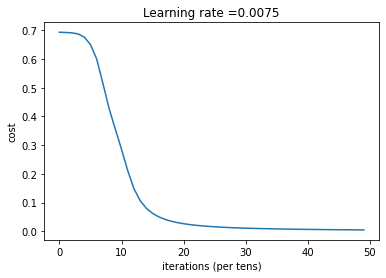

In [38]:
parameters = final_model(X_train.T, np.array(y_train).reshape(1, -1), layers_dims = (n_x, n_h, n_y), num_iterations = 5000, 
                             print_cost=True)